<a href="https://colab.research.google.com/github/sumytayeasmin88/IT-1-Sesh-3/blob/googleColab/IT(1)_SY_ipynb_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from tensorflow import keras
from tensorflow.keras import layers, callbacks

In [ ]:
wine_dataset = pd.read_csv ("/content/wine_dataset.csv") #Importing the dataframe of the dataset to read the data
wine_dataset.sample(12)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
985,6.6,0.640,0.31,6.1,0.083,7.0,49.0,0.99718,3.35,0.68,10.3,5
842,7.2,0.250,0.37,2.5,0.063,11.0,41.0,0.99439,3.52,0.80,12.4,7
402,9.0,0.540,0.49,2.9,0.094,41.0,110.0,0.99820,3.08,0.61,9.2,5
197,10.3,0.320,0.45,6.4,0.073,5.0,13.0,0.99760,3.23,0.82,12.6,8
37,8.6,0.380,0.36,3.0,0.081,30.0,119.0,0.99700,3.20,0.56,9.4,5
486,8.1,0.780,0.23,2.6,0.059,5.0,15.0,0.99700,3.37,0.56,11.3,5
667,10.2,0.440,0.58,4.1,0.092,11.0,24.0,0.99745,3.29,0.99,12.0,7
1107,7.3,0.735,0.00,2.2,0.080,18.0,28.0,0.99765,3.41,0.60,9.4,5
270,7.8,0.460,0.26,1.9,0.088,23.0,53.0,0.99810,3.43,0.74,9.2,6
274,12.0,0.370,0.76,4.2,0.066,7.0,38.0,1.00040,3.22,0.60,13.0,7


In [ ]:
wine_dataset.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
features_num = ['fixed acidity', 'volatile acidity', 'citric acid',
                'residual sugar', 'chlorides', 'free sulfur dioxide',
                'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
features_num

preprocessor = make_column_transformer(
    (StandardScaler(), features_num)
)

# Create training and validation splits
df_train = wine_dataset.sample(frac=0.7, random_state=0)
df_valid = wine_dataset.drop(df_train.index)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)


X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

y_train = df_train['quality']
y_valid = df_valid['quality']


In [ ]:
preprocessor = make_column_transformer(
    (StandardScaler(), features_num)
)

In [ ]:
input_shape=X_train.shape[1]
print(input_shape)

11


In [ ]:
X_train[:,0].mean(), X_train[:, 0].std()

(-1.1990408665951691e-16, 1.0)

<built-in method format of str object at 0x7d3241d624f0>
Minimium validation loss: 0.5816131830215454


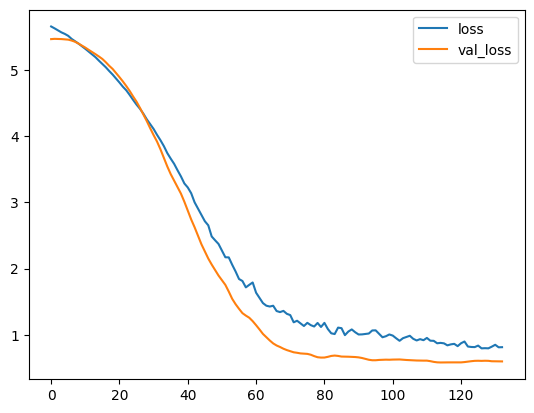

In [ ]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.01, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True
)

model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=30, activation='relu', input_shape=[input_shape]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(units=30, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(units=30, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    # the linear output layer
    layers.Dense(units=1)
])

model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=250,
    epochs=950,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0, # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Accuracy: :{}".format)
print("Minimium validation loss: {}". format(history_df['val_loss'].min()))